<a href="https://colab.research.google.com/github/matetepaps/text-base-emotion-recognition/blob/main/Text_Based_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Detection of Text(Emotion Classification of Text)

### Text classification
### Sentiment Analysis



Given text, classify it as 'neutral or no emotion' or as one, or more, of several given emotions that best represent the mental state of the writer.




In [ ]:
#Load Pacakeges

import pandas as pd
import numpy as np

In [ ]:
# Load database ploting packages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install neattext

In [ ]:
# load Text cleaning packages
import neattext.functions as nfx

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving emotion_dataset_2.csv to emotion_dataset_2 (1).csv


In [ ]:
# load dataset
df = pd.read_csv('emotion_dataset_2 (1).csv')

In [ ]:
# Preview
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [ ]:
# Shape
df.shape

(34792, 2)

In [ ]:
# Datatype
df.dtypes

Emotion    object
Text       object
dtype: object

In [ ]:
# Check for missing Values

df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [ ]:
# Value Counts of Emotion

df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

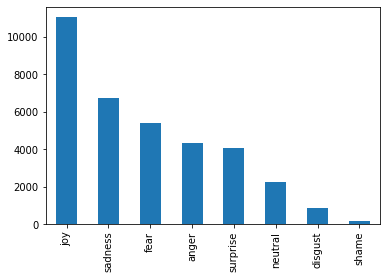

In [ ]:
# Value Counts of Emotion

df['Emotion'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


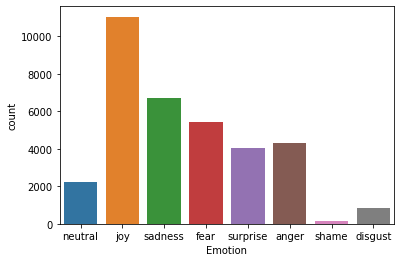

In [ ]:
# Using Seaborn to plot
# Old method
sns.countplot(df['Emotion'])

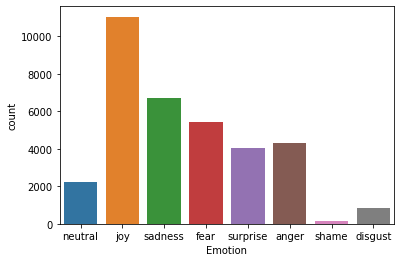

In [ ]:
# New Method
sns.countplot(x='Emotion',data=df)

Note: From our dataset, its a multilabel classification and its imbalance because some of the label are very small, we can drop the small label to give us a more robust model. "joy" has the highest label

### Exploration
+ Text cleaning
+ Sentiment Analysis
+ Keyword Extraction
  - Keyword for each emotion
  - Wordcloud (used to see the most commonest word for a particular sentiment or a particular emotion)

In [ ]:
# Sentiment Analysis
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = 'Postive'
    elif sentiment < 0:
        result = 'Negative'
    else:
        result = 'Neutral'
    return result

In [ ]:
# Text Fraction
get_sentiment('I love coding')

'Postive'

In [ ]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [ ]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Postive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [ ]:
# Compare our Emotion Vs Sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Postive      1124
disgust   Negative      324
          Neutral       251
          Postive       281
fear      Negative     1534
          Neutral      1844
          Postive      2032
joy       Negative     1682
          Neutral      3649
          Postive      5714
neutral   Negative      178
          Neutral      1523
          Postive       553
sadness   Negative     2629
          Neutral      2128
          Postive      1965
shame     Negative       46
          Neutral        50
          Postive        50
surprise  Negative      623
          Neutral      1545
          Postive      1894
dtype: int64

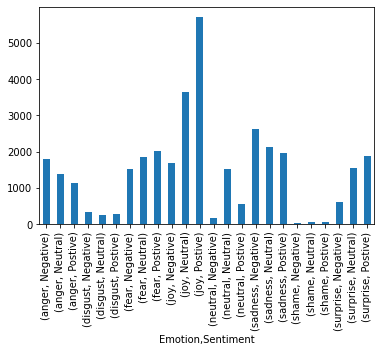

In [ ]:
# Using First method: matplotlib
# Compare our Emotion Vs Sentiment
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [ ]:
# Using Seaborn
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


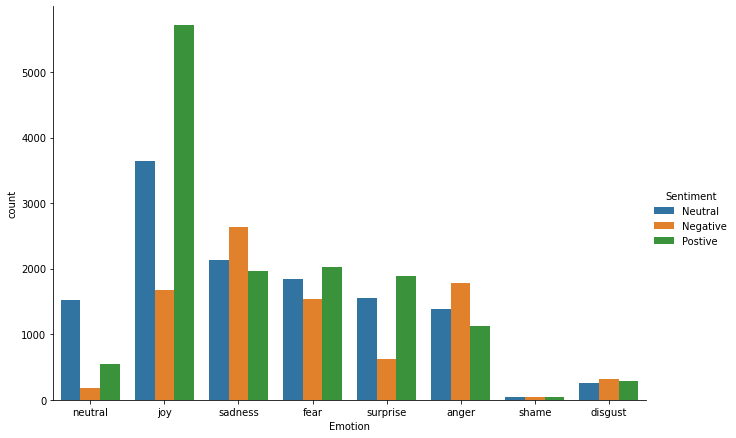

In [ ]:
sns.factorplot(x='Emotion', hue='Sentiment', data = df, kind='count', size = 6, aspect=1.5)

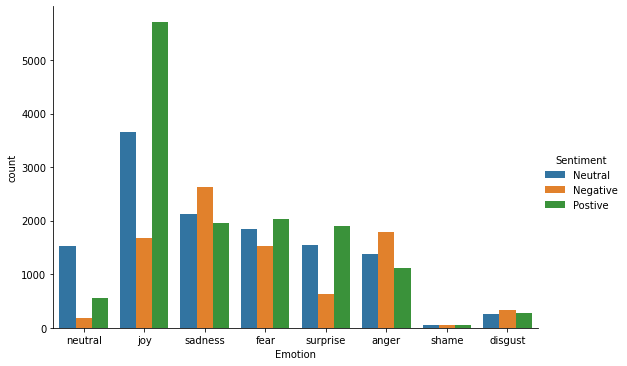

In [ ]:
sns.catplot(x='Emotion', hue='Sentiment', data = df, kind='count', aspect=1.5)

# Text Cleaning
+ Remove noise
  - stopwords
  - Special characters
  - punctuations
  - Emojis

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [ ]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [ ]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_punctuations)

In [ ]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [ ]:
df[['Text', 'Clean_Text']]

,Text,Clean_Text
0,Why ?,Why ?
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz for u .! babe naamazed ...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,have you gift! Hope you like it! It's hand m...
34788,The world didnt give it to me..so the world MO...,The world didnt give it to me..so the world MO...
34789,A man robbed me today .,A man robbed me today .
34790,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu call it JEALOUSY, I call it of #Losing YO..."


### Keyword Extraction
+ Extract most commonest word per class of emotion

In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(text, num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [ ]:
# List of Emotions
emotion_list = df['Emotion'].unique().tolist()

In [ ]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [ ]:
df[df['Emotion'] == 'joy']['Clean_Text']

1          Sage Act upgrade on my to do list for tommorow.
3         Such an eye ! The true hazel eye-and so brill...
4          ugh babe.. hugggzzz for u .!  babe naamazed ...
12       For once in his life , Leopold must have been ...
17         I have a feeling i will fail french #fuckfrench
                               ...                        
34778                   In other news, my mum made EFO.   
34784    ~ As musicas que nois danço com os munitores t...
34785    When I understood that I was admitted to the U...
34786      Tuesday woken up to Oscar and Cornet practice X
34788    The world didnt give it to me..so the world MO...
Name: Clean_Text, Length: 11045, dtype: object

In [ ]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [ ]:
# joy document
joy_docx = ' '.join(joy_list)

In [ ]:
joy_docx

'Sage Act upgrade on my to do list for tommorow.  Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being \' the picture of health \' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself .    ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega\'s mas pinaramdam at fil ko ang  For once in his life , Leopold must have been truly happy : his hopes and prayers for his beloved son seemed at last to have come to fruition .  I have a feeling i will fail french #fuckfrench  Good.Let \' s go now .  When I fell in love with \\X\\".  Overnight I felt confidence, self-esteem,    responsible and worthwhile." One could get terribly ecstatic bu

In [ ]:
# Keyword Extract
keyword_joy = extract_keywords(joy_docx)

In [ ]:
keyword_joy

{'&amp;': 675,
 ',': 1365,
 '.': 2007,
 'Christmas': 409,
 'I': 4457,
 "I'm": 522,
 'The': 516,
 'When': 516,
 'a': 3593,
 'about': 434,
 'all': 607,
 'an': 472,
 'and': 3215,
 'are': 431,
 'as': 384,
 'at': 1123,
 'be': 881,
 'but': 398,
 'day': 580,
 'for': 1981,
 'from': 477,
 'get': 475,
 'had': 635,
 'have': 957,
 'i': 381,
 'in': 2300,
 'is': 1570,
 'it': 850,
 'just': 452,
 'like': 465,
 'me': 948,
 'my': 2792,
 'not': 471,
 'of': 2797,
 'on': 1090,
 'out': 420,
 'so': 596,
 'that': 1205,
 'the': 5293,
 'this': 760,
 'time': 488,
 'to': 4726,
 'up': 588,
 'was': 1151,
 'we': 357,
 'when': 543,
 'with': 1364,
 'work': 396,
 'you': 1174,
 'your': 527}

In [ ]:
# Plot
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(), columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} Most Common Keyword".format(emotion_name))
    sns.barplot(x='token',y='count', data=df_01)
    plt.xticks(rotation=45)
    plt.show()

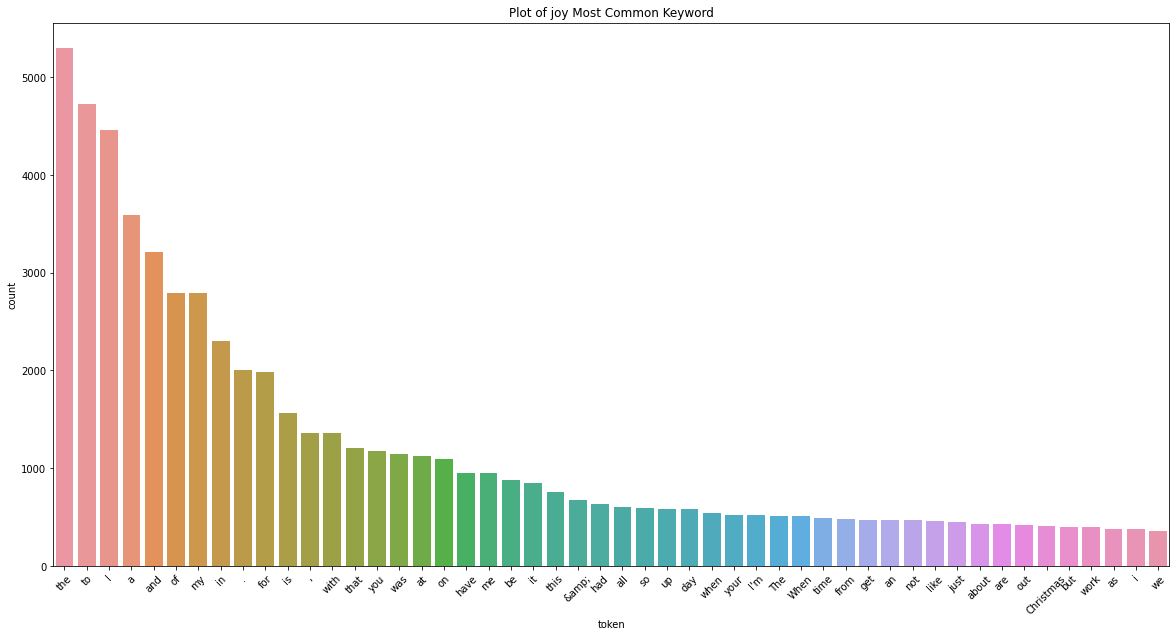

In [ ]:
plot_most_common_words(keyword_joy,'joy')


In [ ]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
#Document
surprise_docx = ' '.join(surprise_list)
#Extract Keyword
keyword_surprise = extract_keywords(surprise_docx)

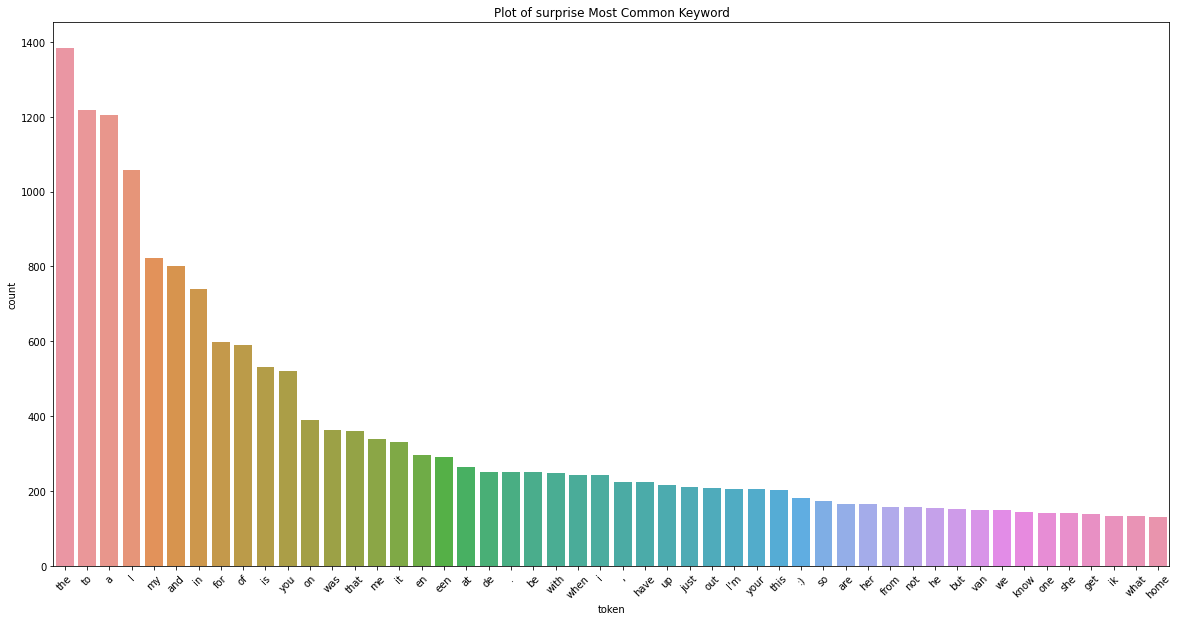

In [ ]:
plot_most_common_words(keyword_surprise,'surprise')


### Word Coud




In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show

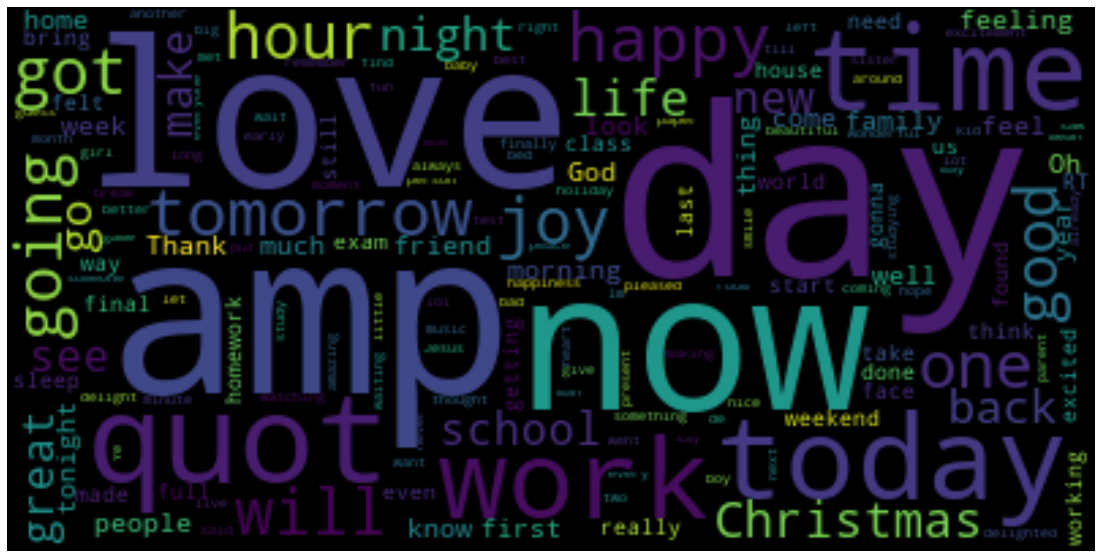

In [ ]:
plot_wordcloud(joy_docx)

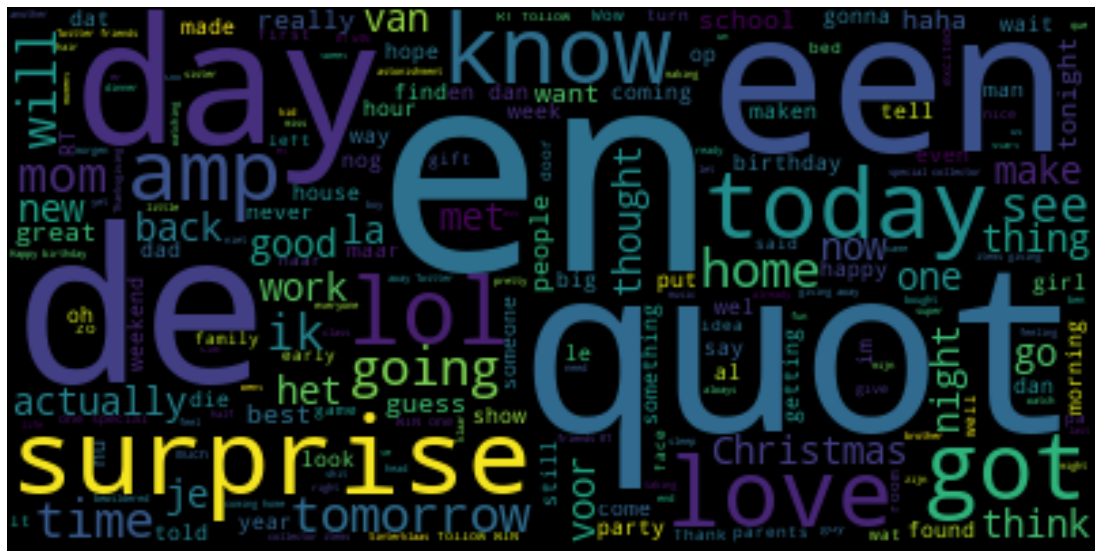

In [ ]:
plot_wordcloud(surprise_docx)

### Machine learning
+ Naive Bayes
+ LogisticRegression
+ KNN
+ Decission Tree


In [ ]:
# Load Machine Learning Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Vectorizer (to convert Text to numeric)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, plot_confusion_matrix

In [ ]:
# Split our Dataset
from sklearn.model_selection import train_test_split

### Build Features from our Text

In [ ]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [ ]:
Xfeatures

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4          ugh babe.. hugggzzz for u .!  babe naamazed ...
                               ...                        
34787      have you gift! Hope you like it! It's hand m...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Clean_Text, Length: 34792, dtype: object

In [ ]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [ ]:
# Get Feature By Name
cv.get_feature_names()

['00',
 '000',
 '000calories',
 '000shs',
 '000th',
 '000yr',
 '000ème',
 '00am',
 '00h',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '04',
 '05',
 '0512',
 '05am',
 '06',
 '073',
 '0800',
 '09',
 '0_0',
 '0_o',
 '0l',
 '0ntworpen',
 '0w',
 '10',
 '100',
 '1000',
 '10000th',
 '1000gifts',
 '1000s',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '102',
 '103',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '11',
 '110',
 '110km',
 '111',
 '1111ème',
 '112',
 '116',
 '118',
 '11am',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '122',
 '123',
 '1250',
 '1252',
 '1260',
 '128',
 '12days',
 '12hours',
 '12hr',
 '12hrstwitter',
 '12km',
 '12th',
 '12x',
 '13',
 '1300',
 '130am',
 '135',
 '13joursdecole',
 '13th',
 '13yo',
 '14',
 '140',
 '1400',
 '1400th',
 '147',
 '14dayz',
 '14h',
 '14th',
 '15',
 '150',
 '1500',
 '1503',
 '1564',
 '15am',
 '15h

In [ ]:
# Split Dataset

X_train, X_test, y_train, y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

### Buid Our Model

In [ ]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# Accuracy
# Method 1
nv_model.score(X_test,y_test)

0.5643801494539183

In [ ]:
# Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [ ]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'joy', 'sadness'],
      dtype='<U8')

### Make a single Prediction
+ Vectorized our Text
+ Applied our Model

In [ ]:
sample_text = ['I love coding so much']

In [ ]:
vect = cv.transform(sample_text).toarray()

In [ ]:
# Make Prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [ ]:
# Check for the prediction Probability(percentage)/ Confidence score
nv_model.predict_proba(vect)

array([[9.21709537e-03, 2.85663303e-04, 7.17661154e-02, 7.27411669e-01,
        4.84613264e-03, 1.47028675e-01, 5.61809524e-07, 3.94440871e-02]])

In [ ]:
# Get all classes for our model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [ ]:
np.max(nv_model.predict_proba(vect))

0.7274116694610203

In [ ]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    print('Prediction:{}, Prediction Score:{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [ ]:
predict_emotion(sample_text, nv_model)

Prediction:joy, Prediction Score:0.7274116694610203


{'anger': 0.009217095369859629,
 'disgust': 0.00028566330292982594,
 'fear': 0.07176611543803701,
 'joy': 0.7274116694610203,
 'neutral': 0.0048461326382836884,
 'sadness': 0.14702867488559654,
 'shame': 5.618095236351805e-07,
 'surprise': 0.039444087094747705}

In [ ]:
predict_emotion(['He hates running all day'],nv_model)

Prediction:joy, Prediction Score:0.7606038412009369


{'anger': 0.01816674314193543,
 'disgust': 9.852988670554755e-05,
 'fear': 0.020639951322864707,
 'joy': 0.7606038412009369,
 'neutral': 0.00031097439234064315,
 'sadness': 0.1824389449233464,
 'shame': 3.924629929670733e-07,
 'surprise': 0.017740622668880116}

### Model Evaluation

In [ ]:
# Classification
print(classification_report(y_test, y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.50      0.56      1283
     disgust       0.28      0.02      0.03       292
        fear       0.73      0.57      0.64      1645
         joy       0.52      0.86      0.65      3311
     neutral       0.75      0.10      0.18       675
     sadness       0.53      0.54      0.54      2015
       shame       0.00      0.00      0.00        36
    surprise       0.60      0.25      0.35      1181

    accuracy                           0.56     10438
   macro avg       0.51      0.36      0.37     10438
weighted avg       0.59      0.56      0.53     10438



In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred_for_nv)

array([[ 645,    1,   62,  354,    2,  205,    0,   14],
       [  38,    5,   27,  141,    0,   75,    0,    6],
       [  78,    3,  936,  370,    6,  176,    1,   75],
       [  67,    3,  104, 2849,    9,  213,    0,   66],
       [  22,    0,   19,  424,   69,  138,    0,    3],
       [  99,    2,   67,  714,    3, 1093,    2,   35],
       [  10,    0,    8,   11,    0,    7,    0,    0],
       [  49,    4,   51,  624,    3,  155,    1,  294]])

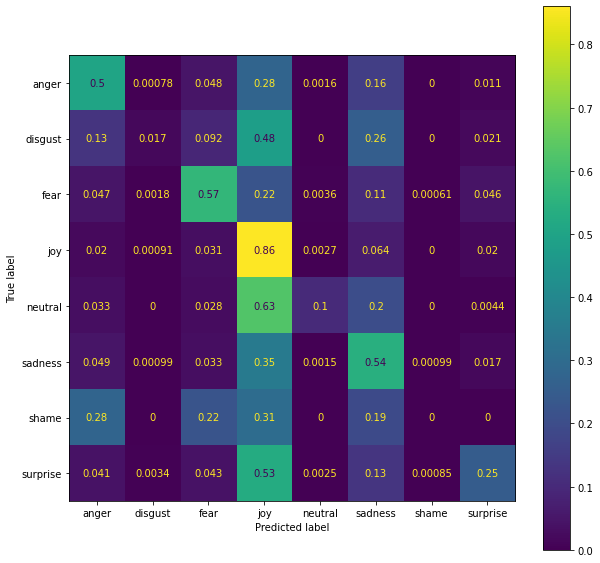

In [ ]:
# Plot for Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(nv_model,X_test,y_test,normalize='true', ax=ax)

### Save Model

In [ ]:
### Save Model

In [ ]:
import joblib

In [ ]:
model_file = open('emotion_classifier_nv_model_8_july_2021.pkl','wb')
joblib.dump(nv_model,model_file)
model_file.close()

In [ ]:
# LogisticRegression
lr_model = LogisticRegression(solver='liblinear', multi_class='auto', max_iter=200)
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Accuracy
lr_model.score(X_test,y_test)


0.6369994251772371

In [ ]:
# Predictions
y_pred_for_lr = lr_model.predict(X_test)

In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred_for_lr)

array([[ 739,    7,   69,  200,   66,  156,    1,   45],
       [  38,   60,   25,   82,    6,   53,    1,   27],
       [  86,    3, 1088,  212,   34,  141,    0,   81],
       [  97,    5,  126, 2547,  122,  255,    1,  158],
       [  15,    0,   14,   79,  515,   43,    0,    9],
       [ 127,    5,   98,  488,   53, 1158,    2,   84],
       [   1,    0,    0,    3,    0,    2,   30,    0],
       [  50,    6,   59,  396,   25,  132,    1,  512]])

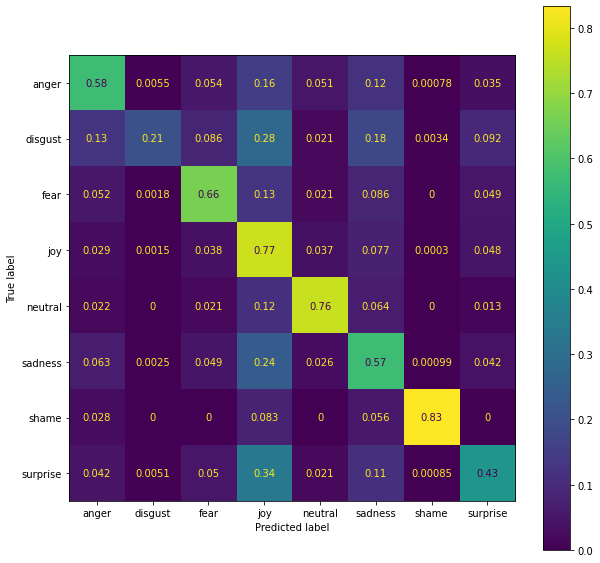

In [ ]:
# Plot for Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lr_model,X_test,y_test,normalize='true', ax=ax)

In [ ]:
#Single predict
predict_emotion(sample_text,lr_model)

Prediction:joy, Prediction Score:0.5029844477447678


{'anger': 0.018308296395185924,
 'disgust': 0.005769091828092598,
 'fear': 0.03711605487741216,
 'joy': 0.5029844477447678,
 'neutral': 0.20394132165039403,
 'sadness': 0.13895300590494783,
 'shame': 0.0008428461388562435,
 'surprise': 0.09208493546034342}

In [ ]:
#Linear Support Vector
lsvc_model = LinearSVC(tol=1e-05)
lsvc_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=1e-05,
          verbose=0)

In [ ]:
# Accuracy
lsvc_model.score(X_test,y_test)

0.6139107108641502

In [ ]:
# Predictions
y_pred_for_lsvc = lsvc_model.predict(X_test)

In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred_for_lsvc)

array([[ 721,   17,   81,  173,   66,  160,    1,   64],
       [  45,   72,   35,   56,    9,   46,    1,   28],
       [  95,    9, 1119,  160,   48,  126,    0,   88],
       [ 149,   15,  152, 2285,  146,  328,    3,  233],
       [  21,    1,   10,   68,  518,   47,    0,   10],
       [ 166,   20,  122,  401,   78, 1128,    2,   98],
       [   0,    0,    0,    2,    0,    0,   34,    0],
       [  65,   18,   71,  326,   36,  133,    1,  531]])

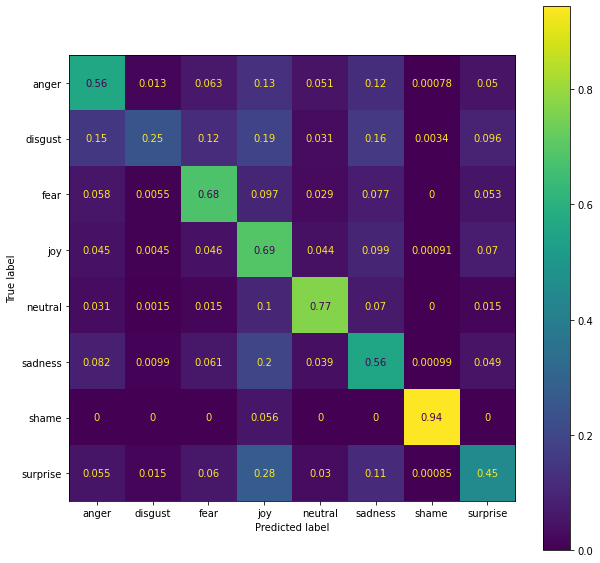

In [ ]:
# Plot for Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lsvc_model,X_test,y_test,normalize='true', ax=ax)

### Model Interpretation
+ Eli5
+ Lime
+ Shap

In [ ]:
pip install eli5

     |████████████████████████████████| 112kB 9.3MB/s 


In [ ]:
# Interpret Model
import eli5

In [ ]:
# Show the weight for each Class/label with LogisticRegression Model
eli5.show_weights(lr_model,top=20)

In [ ]:
class_names= ylabels.unique().tolist()

In [ ]:
feature_names = cv.get_feature_names()

In [ ]:
eli5.show_weights(lr_model,feature_names = feature_names,target_names=class_names)

In [ ]:
# Show the weight for each Class/label with Linear Support Vector Model
eli5.show_weights(lsvc_model,top=20)

In [ ]:
eli5.show_weights(lsvc_model,feature_names = feature_names,target_names=class_names)